# Support Vector Machines

Support Vector Machines (SVM) are **supervised learning algorithms** used for **classification and regression** tasks. They work by finding the optimal hyperplane that separates data points of different classes with the **maximum margin**. 

SVMs are **effective in high-dimensional spaces** and can use **kernel functions** to handle non-linear relationships.

<img src="https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png"/>

## 1. SVC - Support Vector Classifier

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn SVM libraries

from sklearn.svm import SVC
from sklearn.svm import SVR

#import other sklearn libraries for data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset
df = pd.read_csv('2_2_admission_based_on_exam_scores_dataset.csv')
df.head()

,exam_1_marks,exam_2_marks,admission_status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Dataset Explanation

This dataset contains information about students' exam scores and their admission status. It has three columns:

- **exam_1_marks**: The score obtained by a student in Exam 1 (float).
- **exam_2_marks**: The score obtained by a student in Exam 2 (float).
- **admission_status**: Indicates whether the student was admitted (1) or not admitted (0) (integer).

Each row represents a student. The goal is typically to predict `admission_status` based on the exam scores, making this a binary classification problem.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   exam_1_marks      100 non-null    float64
 1   exam_2_marks      100 non-null    float64
 2   admission_status  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.describe()

,exam_1_marks,exam_2_marks,admission_status
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


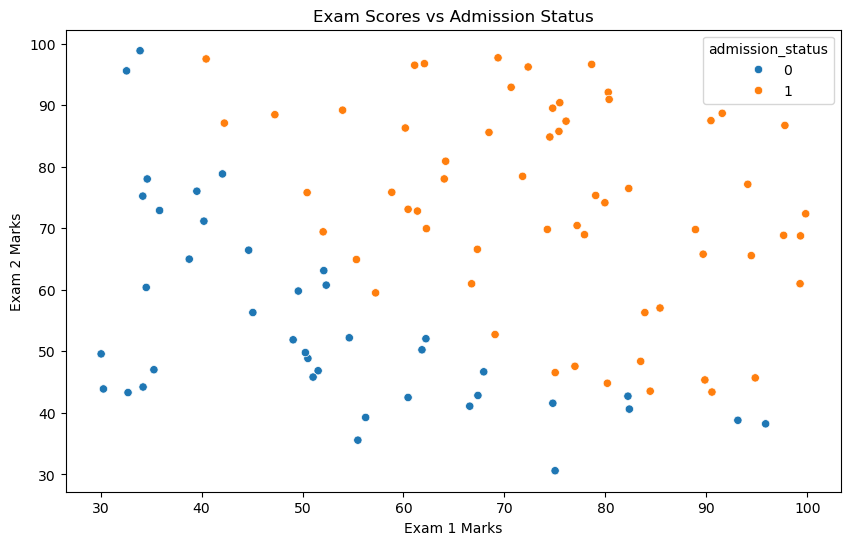

In [12]:
# see the visualization of the dataset using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='exam_1_marks', y='exam_2_marks', hue='admission_status')
plt.title('Exam Scores vs Admission Status')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

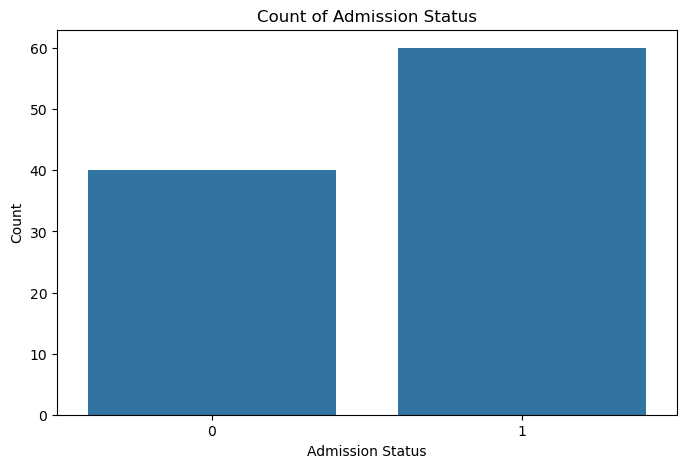

In [13]:
# see the countplot of the admission status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='admission_status')
plt.title('Count of Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('Count')
plt.show()

In [5]:
# X and y split
X = df[['exam_1_marks', 'exam_2_marks']]
y = df['admission_status']


In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'StandardScaler' is not defined

In [9]:
# Crate and train SVM classifier model
model = SVC(kernel='linear')  # You can change the kernel as needed (e.g., 'rbf', 'poly', etc.)
model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# predict on the test set
y_pred = model.predict(X_test_scaled)

In [11]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 7  1]
 [ 2 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [3]:
# plot the decision boundary with sklearn SVM

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=model, legend=2)

NameError: name 'X_train_scaled' is not defined

In [2]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s  0:00:00


ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 20.

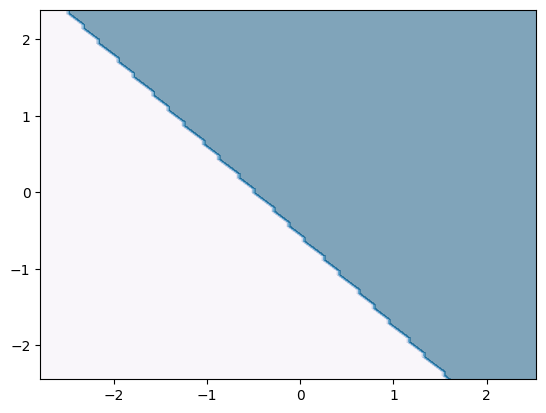

In [12]:
# plot the decision boundary with sklearn SVM
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_test_scaled,
    response_method="predict",
    cmap=plt.cm.PuBu,
    alpha=0.5,
)
disp.ax_.scatter(
    X_test_scaled[:, 0],
    X_test_scaled[:, 1],
    c=y,
    edgecolor="k",
    cmap=plt.cm.PuBu,
)
disp.ax_.set_title("SVC with linear kernel")
plt.xlabel('Exam 1 Marks (scaled)')
plt.ylabel('Exam 2 Marks (scaled)')
plt.show()

In [14]:
# Use hyperparameter tuning to find the best parameters for the SVM model

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [15]:
# predict on the gird search model
y_pred_grid = grid.predict(X_test)

In [16]:
# evaluate the gird search model
print("Best Parameters from Grid Search:", grid.best_params_)


Best Parameters from Grid Search: {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}


In [17]:
# evaluate acoording to the best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix for Best Model:
[[ 8  0]
 [ 0 12]]

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



------------------

## Scikit-learn Pipeline

## Scikit-learn Pipeline

The `Pipeline` class in scikit-learn is a tool that allows you to **chain multiple data processing steps and modeling steps together** into a single object. Each step in the pipeline is a tuple containing a name and an estimator (such as a transformer or a model).

### Why do we use Pipeline?

- **Streamlined Workflow:** Pipelines automate the sequence of data transformations and model training, making code cleaner and easier to manage.
- **Reproducibility:** Ensures that the same transformations are applied during both training and prediction.
- **Prevents Data Leakage:** By fitting transformers only on the training data within cross-validation, pipelines help avoid leaking information from the test set.
- **Simplifies Hyperparameter Tuning:** You can tune parameters of all steps in the pipeline using tools like `GridSearchCV`.
- **Consistency:** Guarantees that preprocessing steps are always applied in the correct order.

**Example:**  
A typical pipeline might include scaling features and then fitting an SVM classifier:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
```

This ensures that scaling and classification are always performed together, both during training and prediction.

In [30]:
# Do it with Scikit-learn with different pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [31]:
y_pred_pipeline = pipeline1.predict(X_test)
print("Confusion Matrix for Pipeline Model:")
print(confusion_matrix(y_test, y_pred_pipeline))
print("\nClassification Report for Pipeline Model:")
print(classification_report(y_test, y_pred_pipeline))

Confusion Matrix for Pipeline Model:
[[ 7  1]
 [ 2 10]]

Classification Report for Pipeline Model:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [32]:
param_grid_pipeline = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_pipeline = GridSearchCV(pipeline1, param_grid_pipeline, cv=5)
grid_pipeline.fit(X_train, y_train)

print("Best parameters:", grid_pipeline.best_params_)

y_pred_pipeline = grid_pipeline.predict(X_test)
print("Confusion Matrix for Pipeline Model:")
print(confusion_matrix(y_test, y_pred_pipeline))
print("\nClassification Report for Pipeline Model:")
print(classification_report(y_test, y_pred_pipeline))

Best parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Confusion Matrix for Pipeline Model:
[[ 8  0]
 [ 1 11]]

Classification Report for Pipeline Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



-----------------

## SVR - Support Vector Regressor

Support Vector Regressor (SVR) is a regression algorithm based on Support Vector Machines. 

It finds a function that **best fits the data by maximizing the margin within a specified error tolerance**, making it **robust to outliers and effective for both linear and non-linear regression** tasks using kernel functions.

In [5]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# install sklearn modules
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df= pd.read_csv("2_2_diamonds_dataset.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# delete unnamed column
df=df.drop(columns='Unnamed: 0')

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# clean x or y .. equlas = 0 rows
df[df['z']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [14]:
len(df[df['z']==0].index)

20

In [15]:
df.drop(df[df['z']==0].index, inplace=True)

In [16]:
df[df['z']==0].index

Index([], dtype='int64')

In [17]:
df.describe() # 20 rows with x, or z ==0 dropped

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


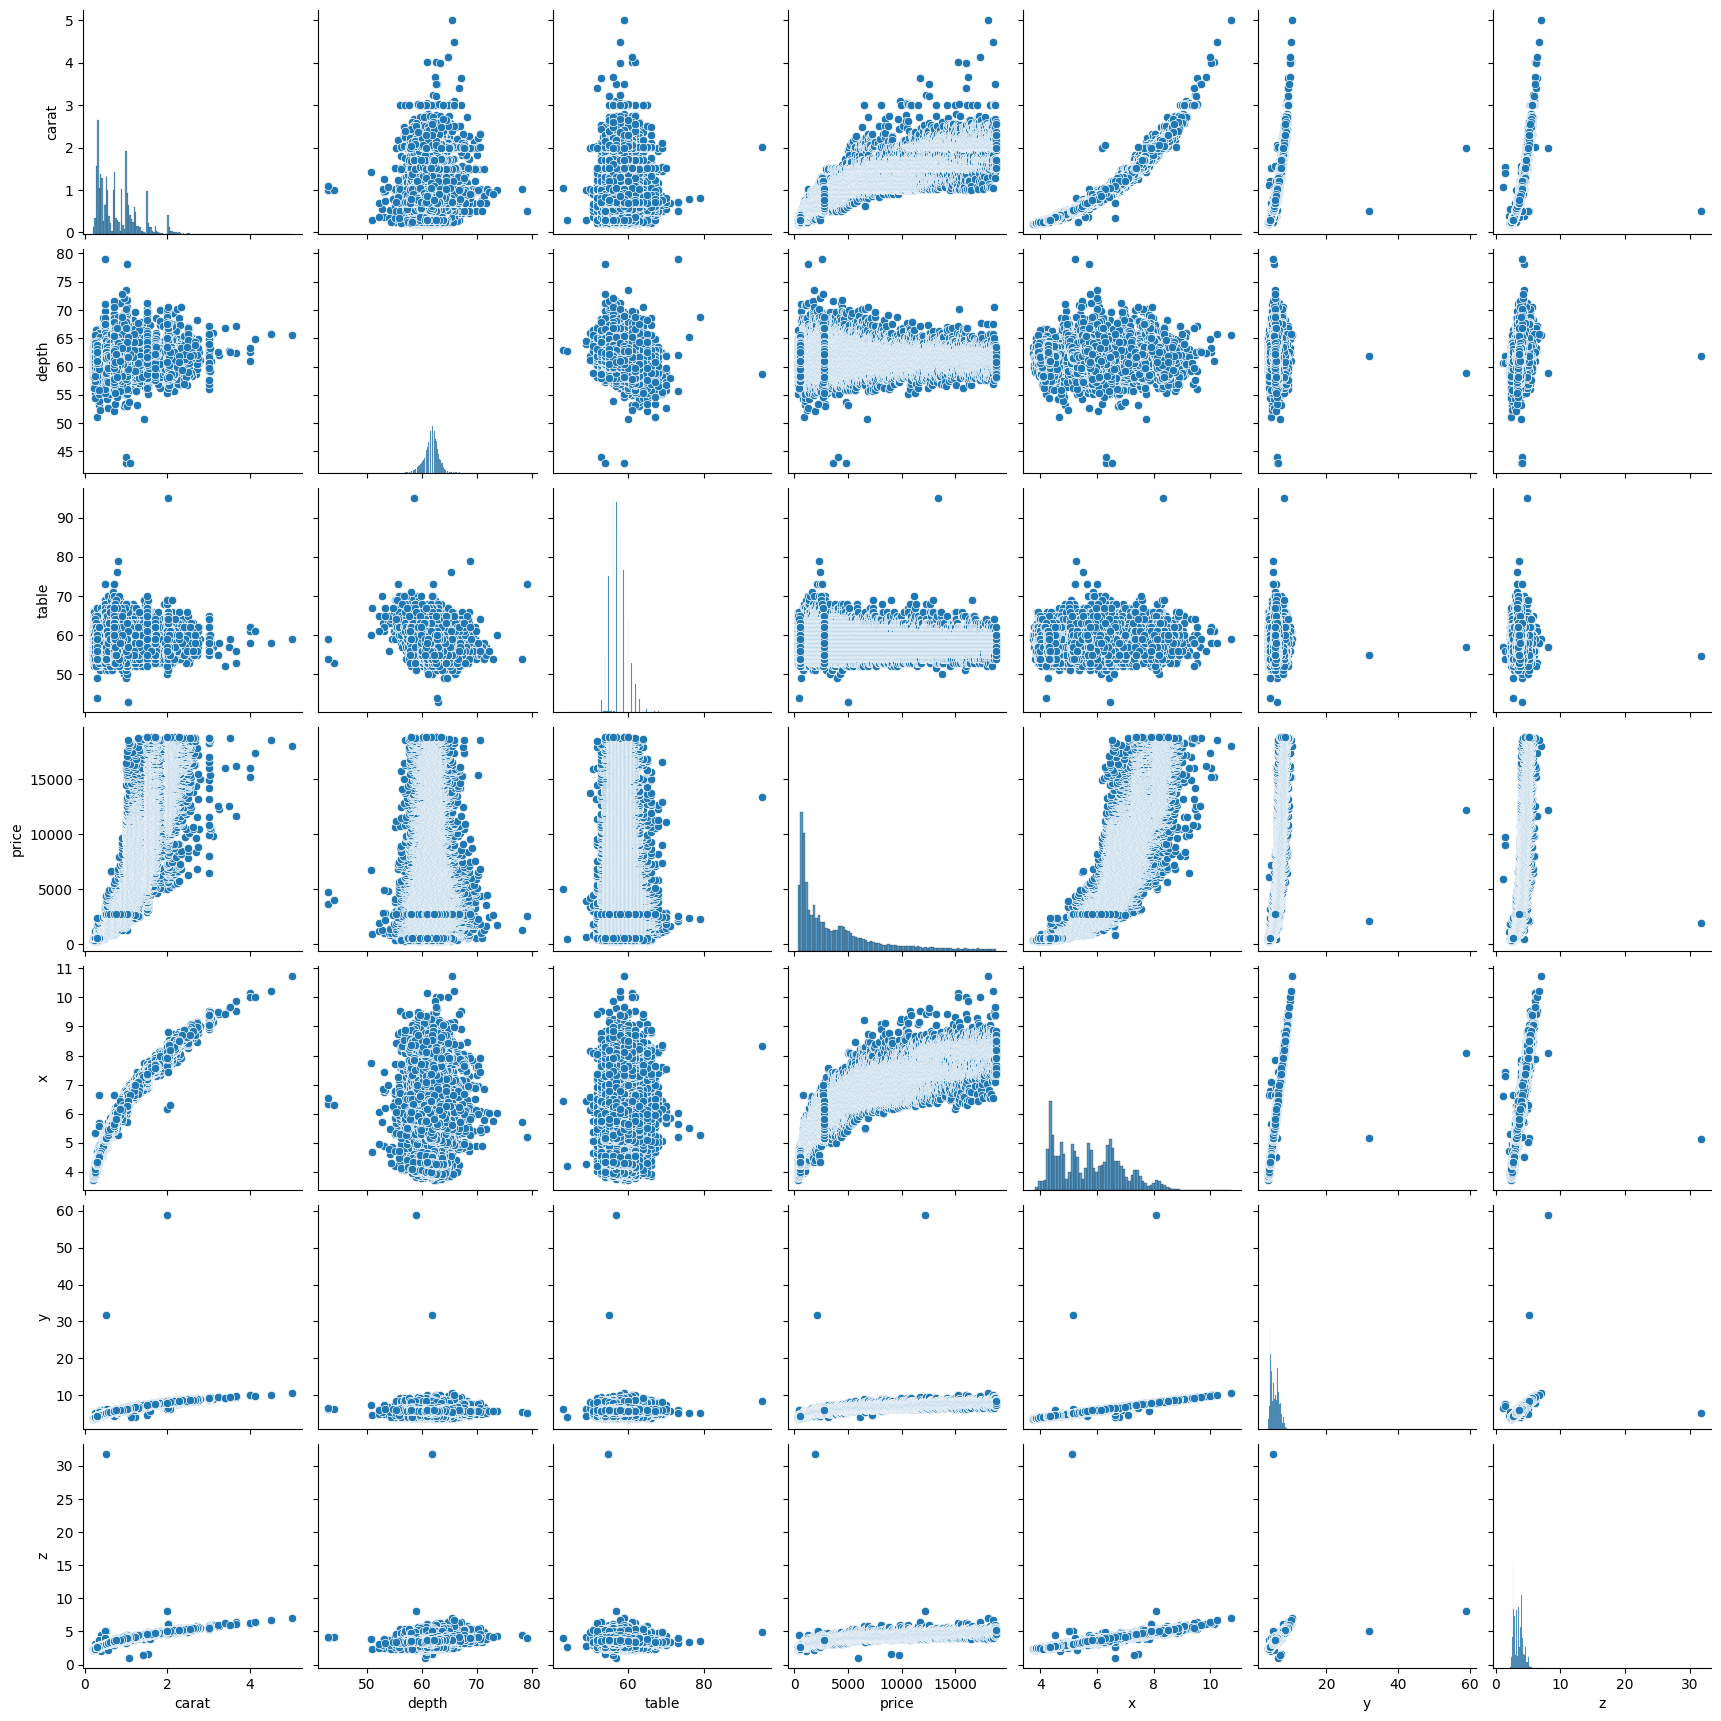

In [18]:
# plot figuresize
sns.pairplot(data=df)

In [19]:
# see the categorical columns
df.select_dtypes(include=['object']).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [20]:
df["cut"].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [21]:
# give specific value to each category
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
# specific ordinal encoder

# 0:Fair, 1:Good, 2:Very Good, 3:Premium, 4:Ideal

df["cut"] = df["cut"].map({"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4})

In [22]:
# crate an ordinal encoder for cut column
from sklearn.preprocessing import OrdinalEncoder

cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
ordinal=OrdinalEncoder(categories=[cut_categories])

df["cut"]=ordinal.fit_transform(df[["cut"]])
df["cut"].value_counts()

cut
4.0    21548
3.0    13780
2.0    12081
1.0     4902
0.0     1609
Name: count, dtype: int64

In [23]:
df["color"].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [24]:
# create a label encoder for color column
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["color"]=label.fit_transform(df["color"])

In [25]:
df["color"].value_counts()

color
3    11284
1     9797
2     9538
4     8298
0     6774
5     5421
6     2808
Name: count, dtype: int64

In [26]:
df["clarity"].value_counts()    

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [27]:
# create a label encoder for clarity column
df["clarity"]=label.fit_transform(df["clarity"])
df["clarity"].value_counts()

clarity
2    13063
5    12254
3     9185
4     8170
7     5066
6     3654
1     1790
0      738
Name: count, dtype: int64

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6,3,63.3,58.0,335,4.34,4.35,2.75


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.5 MB


In [61]:
df.shape

(53920, 10)

In [31]:
# Create X and y
X=df.drop(columns="price")
y=df["price"]


In [32]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43136, 9) (10784, 9) (43136,) (10784,)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.5 MB


In [34]:
# scale numeriacal float features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) # here we don use fit_transform because we already fit the scaler to the train data


In [35]:
# create a SVR model
model=SVR(kernel="linear")

In [36]:
# train the model
model.fit(X_train_scaled, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [37]:
# predict model
y_pred=model.predict(X_test_scaled)

In [38]:
# see the evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 2460340.416284383
R2: 0.8465351823516633


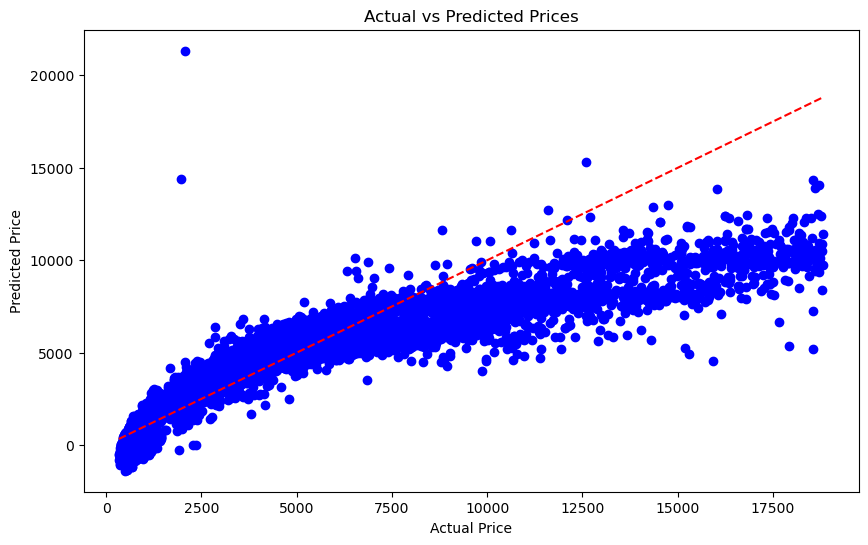

In [73]:
# show the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',  label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# create model with hyper parametres with GridSeachCV
from sklearn.model_selection import GridSearchCV

param_grid={
    "kernel":["linear", "rbf", "poly", "sigmoid"],
    "C":[0.1, 1, 10, 100],
    "gamma":["scale", "auto"]
}

grid=GridSearchCV(SVR(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
# predict with grid search model
y_pred_grid=grid.predict(X_test)
# see the evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred_grid))
print("R2:", r2_score(y_test, y_pred_grid))